<a href="https://colab.research.google.com/github/Abhishek00809/Python_codes/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.DATA COLLECTION


In [44]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 1.Data Loading
#importing a file
file_name = '/content/drive/MyDrive/Sem_01_Assignments/Machine_Learning/household_power_consumption.txt'
print(f"Downloading and loading {file_name}...")


In [46]:
# since file is in .txt so converting to CSV file ( for easy and better results from the model)
import pandas as pd
# Reading the text file into a DataFrame, assuming semicolon delimiter
df = pd.read_csv(file_name, sep=';', low_memory=False)
print(f"Successfully loaded {file_name} into a DataFrame.")


Successfully loaded /content/drive/MyDrive/Sem_01_Assignments/Machine_Learning/household_power_consumption.txt into a DataFrame.


In [47]:
# Defining the output CSV file name
output_file_name = 'household_power_consumption.csv'

# Converting the DataFrame to a CSV file
df.to_csv(output_file_name, index=False)
print(f"Successfully converted and saved to {output_file_name}.")

# Displaying the first 5 rows of the newly created CSV file
print('Displaying the first 5 rows of the new CSV file:')
display(pd.read_csv(output_file_name, low_memory=False).head())

Successfully converted and saved to household_power_consumption.csv.
Displaying the first 5 rows of the new CSV file:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [48]:
# Saving and moving file in drive
import shutil
destination_path = '/content/drive/MyDrive/household_power_consumption.csv'
shutil.move('household_power_consumption.csv', destination_path)
print(f"Moved 'household_power_consumption.csv' to {destination_path}")

Moved 'household_power_consumption.csv' to /content/drive/MyDrive/household_power_consumption.csv


2.DATA PREPROCESSING

In [49]:
# Handling missing values
if df.isnull().sum().any():
    print("Missing values detected. Filling with forward fill.")
    df.fillna(method='ffill', inplace=True)
else:
    print("No missing values detected.")

#Convert specified columns to numeric.()
columns_to_convert = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(f"Converted {', '.join(columns_to_convert)} to numeric.")

# Removing duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print(f"Removed {initial_rows - final_rows} duplicate rows.")
print("Data inspection and cleaning complete. Displaying info and head of the cleaned DataFrame.")

df.info()
df.head()


Missing values detected. Filling with forward fill.


/tmp/ipython-input-2306205333.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Converted Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3 to numeric.
Removed 0 duplicate rows.
Data inspection and cleaning complete. Displaying info and head of the cleaned DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0



In next step combined the 'Date' and 'Time' columns into a single datetime index, which is crucial for time-series analysis and resampling. This aligns with the overall subtask of data preprocessing.



In [50]:
import pandas as pd

# Creation of Datetime index
# Combine 'Date' and 'Time' columns into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set the new 'DateTime' column as the DataFrame index
df.set_index('DateTime', inplace=True)

# Drop the original 'Date' and 'Time' columns as they are no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

print("Combined 'Date' and 'Time' into a DateTime index and dropped original columns.")
print("DataFrame info after creating DateTime index:")
df.info()
print("DataFrame head after creating DateTime index:")
df.head()

Combined 'Date' and 'Time' into a DateTime index and dropped original columns.
DataFrame info after creating DateTime index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
DataFrame head after creating DateTime index:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


The next step in the data preprocessing task is to resample the data to an **hourly frequency**. This is crucial for reducing the frequence of noice of the time series data and making it more manageable for analysis.

In [51]:
print("Resampling data to hourly frequency...")
# Resample the DataFrame to an hourly frequency, taking the mean for numerical columns
df_hourly = df.resample('h').mean()

print("Data resampled to hourly frequency. Displaying info and head of the resampled DataFrame.")
df_hourly.info()
df_hourly.head()

Resampling data to hourly frequency...
Data resampled to hourly frequency. Displaying info and head of the resampled DataFrame.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34168 non-null  float64
 1   Global_reactive_power  34168 non-null  float64
 2   Voltage                34168 non-null  float64
 3   Global_intensity       34168 non-null  float64
 4   Sub_metering_1         34168 non-null  float64
 5   Sub_metering_2         34168 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [52]:
#Feature Engineering
print("Created time-based features (Hour, Day_of_Week, Month) from the DateTime index...")

# Create 'Hour' feature
df_hourly['Hour'] = df_hourly.index.hour

# Create 'Day_of_Week' feature (Monday=0, Sunday=6)
df_hourly['Day_of_Week'] = df_hourly.index.dayofweek

# Create 'Month' feature
df_hourly['Month'] = df_hourly.index.month

print("Time-based features created. Displaying head of the processed DataFrame.")
df_hourly.head()

Created time-based features (Hour, Day_of_Week, Month) from the DateTime index...
Time-based features created. Displaying head of the processed DataFrame.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day_of_Week,Month
DateTime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,12
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,12
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,12
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,12
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,12


# Exploratory Data Analysis:  
-->Generates and displays descriptive statistics (like mean, standard deviation, min, max, quartiles) for all numerical columns in the df_hourly DataFrame.

-->Concise summary of the df_hourly DataFrame, including its index dtype, column dtypes, non-null values, and memory usage

In [53]:
print("descriptive statistics for df_hourly:")
display(df_hourly.describe())

print("DataFrame information for df_hourly:")
df_hourly.info()

descriptive statistics for df_hourly:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day_of_Week,Month
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.091728,0.123727,240.839393,4.628238,1.121631,1.298566,6.416515,11.501084,2.998959,6.450548
std,0.897619,0.066851,3.001093,3.757797,3.538046,4.192874,7.344718,6.922394,2.000072,3.415879
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.341925,0.078000,239.180667,1.513333,0.000000,0.000000,0.650000,6.000000,1.000000,3.000000
50%,0.802850,0.106917,240.977833,3.423333,0.000000,0.333333,1.650000,12.000000,3.000000,6.000000
75%,1.579342,0.149433,242.695000,6.606667,0.000000,0.650000,14.083333,18.000000,5.000000,9.000000
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000,23.000000,6.000000,12.000000


DataFrame information for df_hourly:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34168 non-null  float64
 1   Global_reactive_power  34168 non-null  float64
 2   Voltage                34168 non-null  float64
 3   Global_intensity       34168 non-null  float64
 4   Sub_metering_1         34168 non-null  float64
 5   Sub_metering_2         34168 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
 7   Hour                   34589 non-null  int32  
 8   Day_of_Week            34589 non-null  int32  
 9   Month                  34589 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 2.5 MB


# Visualizations

Imported matplotlib.pyplot as plt and seaborn as sns.


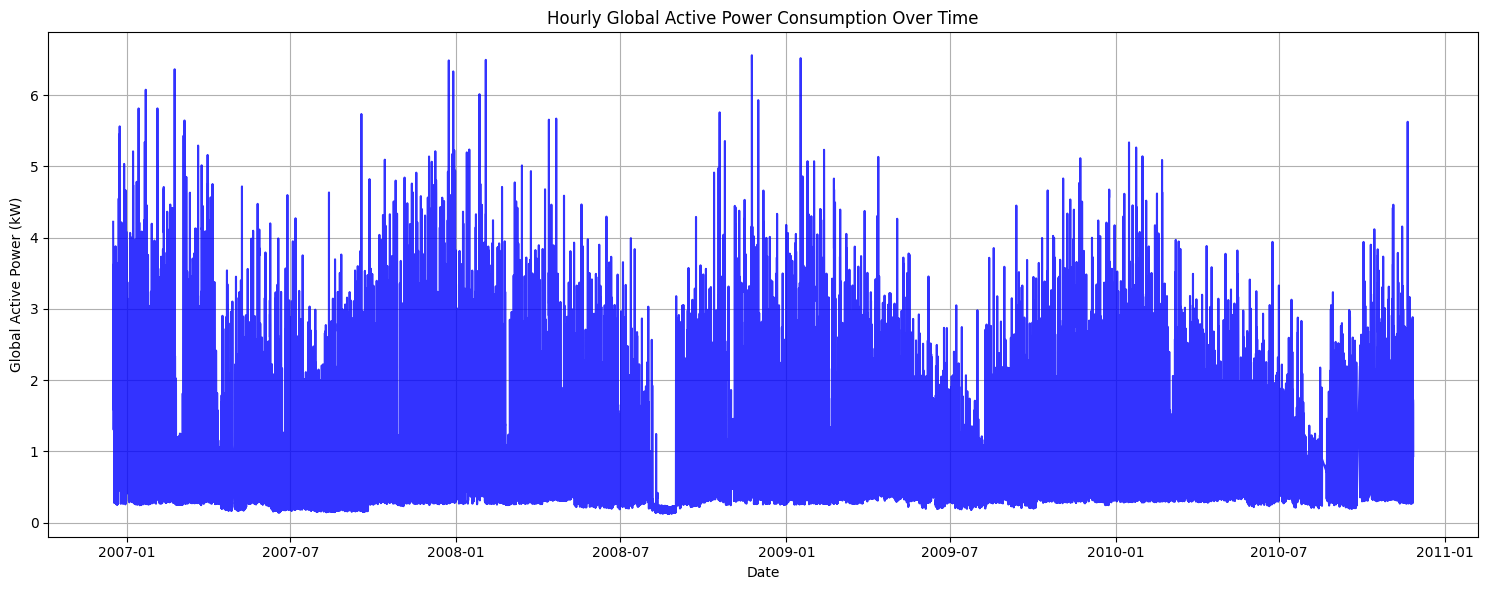

Line plot of 'Global_active_power' over time displayed.


In [54]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported matplotlib.pyplot as plt and seaborn as sns.")

#line plot for 'Global_active_power' from the df_hourly DataFrame
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_hourly.index, y=df_hourly['Global_active_power'], color='blue', alpha=0.8)
plt.title('Hourly Global Active Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Line plot of 'Global_active_power' over time displayed.")

 Two box plots: one showing the distribution of 'Global_active_power' by 'Hour', and another by 'Day_of_Week'. These visualizations will help identify hourly and weekly seasonal patterns in energy consumption.

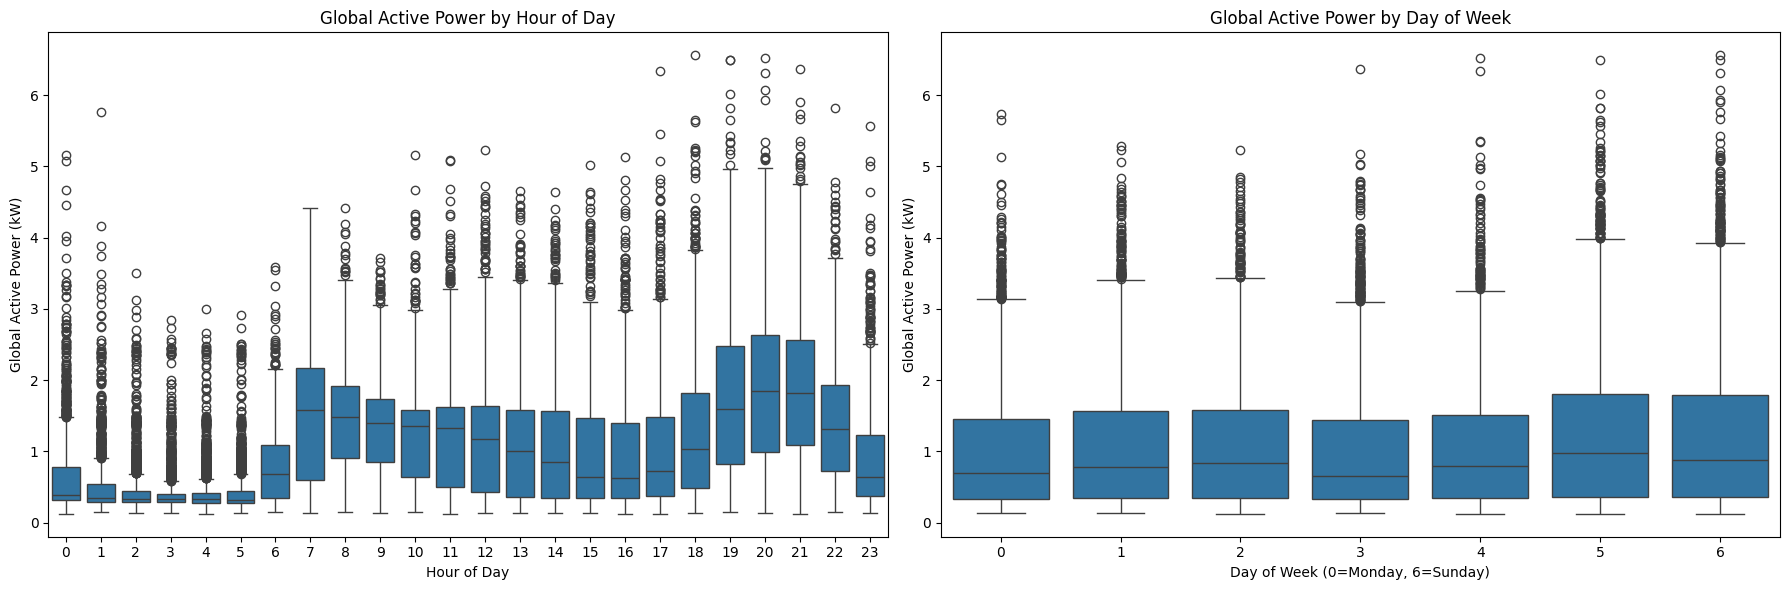

Box plots for hourly and daily seasonality displayed.


In [55]:
plt.figure(figsize=(18, 6))

# Box plot for Global_active_power by Hour
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x='Hour', y='Global_active_power', data=df_hourly)
plt.title('Global Active Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kW)')

# Box plot for Global_active_power by Day_of_Week
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(x='Day_of_Week', y='Global_active_power', data=df_hourly)
plt.title('Global Active Power by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Global Active Power (kW)')

plt.tight_layout()
plt.show()
print("Box plots for hourly and daily seasonality displayed.")

Generating box plot for monthly seasonality...


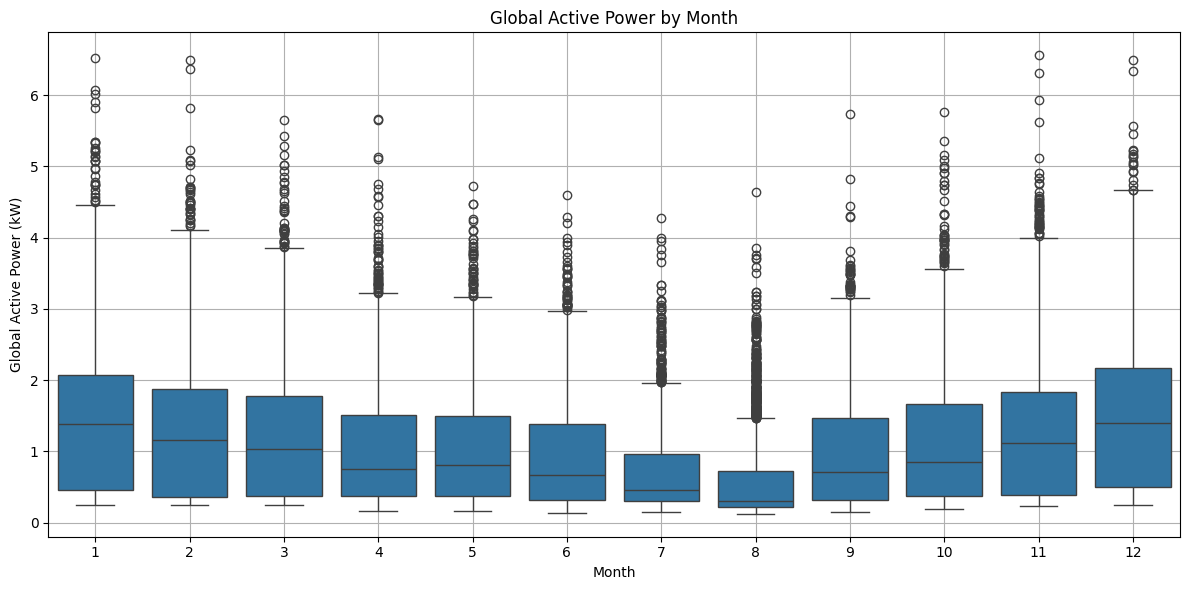

Box plot for monthly seasonality displayed.


In [56]:
# Visualizing Monthly Seasonality
# box plot to show the distribution of 'Global_active_power' by 'Month'
print("Generating box plot for monthly seasonality...")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Global_active_power', data=df_hourly)
plt.title('Global Active Power by Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Box plot for monthly seasonality displayed.")

**Data Analysis Key Findings**(Summary)

**Data Preparation**: The raw data of .txt file is converted to csv file imputed using forward fill, duplicate rows were removed, and the dataset was resampled to an hourly frequency (df_hourly). New time-based features (Hour, Day_of_Week, Month) were extracted for seasonality analysis.

**Overall Consumption Trend**: The line plot of 'Global_active_power' over the entire period shows that energy consumption generally fluctuates, with visible periods of higher and lower activity. There are no immediately obvious long-term increasing or decreasing trends, but rather significant variability over the years.

**Hourly Seasonality:**
Energy consumption typically starts to rise in the morning (around 6-7 AM), peaks in the evening hours (around 7-9 PM), and then decreases significantly during the late night and early morning (12 AM - 6 AM).
The median 'Global_active_power' is lowest during the early morning hours and highest during the evening peak.

**Daily Seasonality:**
Weekdays (Monday to Friday, 0-4) show a relatively consistent pattern of higher median 'Global_active_power' compared to weekends (Saturday and Sunday, 5-6).
Consumption on weekends, especially Sundays, tends to be slightly lower on average, indicating a drop in activity.

**Monthly Seasonality:**
Energy consumption appears to be higher during the colder months (e.g., January, February, March, November, December), suggesting increased heating or indoor activity.
Consumption is generally lower during the warmer summer months (e.g., June, July, August), indicating reduced heating demand.

## Model Selection and Domain

In [57]:
# Spliting preprocessed time-series dataset into training and testing sets
# DataFrame into training and testing sets based on an 80/20 ratio.
# Calculating the split index, create the two DataFrames, and then print their shapes for verification.

print("Splitting df_hourly into training and testing sets chronologically...")

# 1. Determine the index for the split point (e.g., 80% for training, 20% for testing)
split_index = int(len(df_hourly) * 0.8)
print(f"Calculated split index: {split_index} (80% of {len(df_hourly)} rows)")

# 2. Create the training set
train_df = df_hourly.iloc[:split_index]

# 3. Create the testing set
test_df = df_hourly.iloc[split_index:]

# 4. Print the shapes of train_df and test_df to verify the split
print(f"Shape of training set (train_df): {train_df.shape}")
print(f"Shape of testing set (test_df): {test_df.shape}")

print("Data split into training and testing sets successfully.")

Splitting df_hourly into training and testing sets chronologically...
Calculated split index: 27671 (80% of 34589 rows)
Shape of training set (train_df): (27671, 10)
Shape of testing set (test_df): (6918, 10)
Data split into training and testing sets successfully.


In [58]:
# 3 existing machine learning algorithms suitable for time-series forcasting
#1.Random Forest Regressor:A modern ensemble learning method that builds multiple decision trees
#2.Gradient Boosting Regressor:Another modern ensemble learning method that sequentially builds decision trees
#3.ARIMA (AutoRegressive Integrated Moving Average):A classical statistical model (ARIMA(p, d, q))

#Feature engineering and data splitting for supervised models
#creating a lagged features for 'Global_active_power',then combine them with existing time based featues.

print("Starting feature engineering for supervised models...")

# copy of the df_hourly DataFrame to perform feature engineering
df_fe = df_hourly.copy()
print("Created a copy of df_hourly as df_fe.")

# lagged features for 'Global_active_power'
df_fe['Global_active_power_lag_1'] = df_fe['Global_active_power'].shift(1)
df_fe['Global_active_power_lag_24'] = df_fe['Global_active_power'].shift(24)
df_fe['Global_active_power_lag_48'] = df_fe['Global_active_power'].shift(48)
df_fe['Global_active_power_lag_168'] = df_fe['Global_active_power'].shift(168)
print("Created lagged features for 'Global_active_power'.")

# Drop any rows that contain NaN values (which result from the lagging operation)
initial_rows_fe = df_fe.shape[0]
df_fe.dropna(inplace=True)
final_rows_fe = df_fe.shape[0]
print(f"Dropped {initial_rows_fe - final_rows_fe} rows with NaN values after creating lagged features.")

# Define the feature matrix X, including lagged and time-based features
features = [
    'Global_active_power_lag_1',
    'Global_active_power_lag_24',
    'Global_active_power_lag_48',
    'Global_active_power_lag_168',
    'Hour',
    'Day_of_Week',
    'Month'
]
X = df_fe[features]
print("Defined feature matrix X.")

# Define the target vector y
y = df_fe['Global_active_power']
print("Defined target vector y.")

# Calculate the split index for 80% training and 20% testing based on the current DataFrame length
split_index = int(len(X) * 0.8)
print(f"Calculated split index: {split_index} (80% of {len(X)} rows after feature engineering)")

# Split X into X_train and X_test chronologically
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
print("Split X into training and testing sets.")

# Split y into y_train and y_test chronologically
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]
print("Split y into training and testing sets.")

# Print the shapes of X_train, X_test, y_train, and y_test to verify the splits
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("Feature engineering and data splitting for supervised models complete.")




Starting feature engineering for supervised models...
Created a copy of df_hourly as df_fe.
Created lagged features for 'Global_active_power'.
Dropped 1330 rows with NaN values after creating lagged features.
Defined feature matrix X.
Defined target vector y.
Calculated split index: 26607 (80% of 33259 rows after feature engineering)
Split X into training and testing sets.
Split y into training and testing sets.
Shape of X_train: (26607, 7)
Shape of X_test: (6652, 7)
Shape of y_train: (26607,)
Shape of y_test: (6652,)
Feature engineering and data splitting for supervised models complete.


Imported RandomForestRegressor from sklearn.ensemble.
Time to build a RandomForestRegressor model!
RandomForestRegressor model created! Ready to learn.
RandomForestRegressor is all trained up! It's learned so much.
Predictions are in! Let's see how it did.
Results DataFrame is ready for inspection!


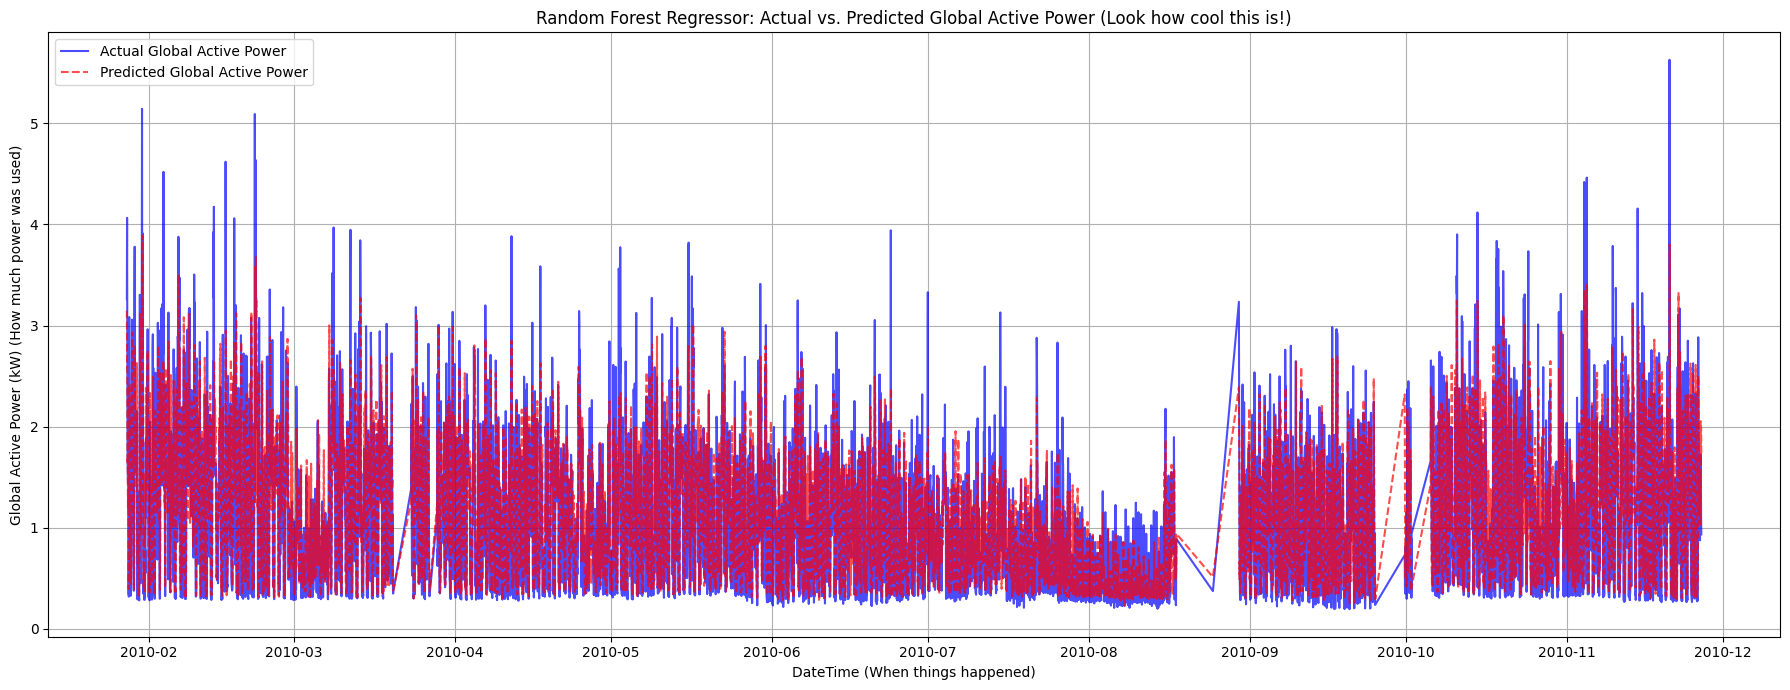

Plot of Actual vs. Predicted Global Active Power displayed!


In [59]:
from sklearn.ensemble import RandomForestRegressor
print("Imported RandomForestRegressor from sklearn.ensemble.")

print("Time to build a RandomForestRegressor model!")

# First, we need to create our Random Forest Regressor model object.
# We'll set n_estimators to 100 (that's 100 decision trees!)--(industry standard,probably effective) and random_state for reproducible results.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
print("RandomForestRegressor model created! Ready to learn.")

# Now, let's train our model using the training data (X_train and y_train).
# This is where the model learns from the historical patterns.
rf_model.fit(X_train, y_train)
print("RandomForestRegressor is all trained up! It's learned so much.")

# After training, we can ask the model to predict values on our test data (X_test).
# These are the values the model hasn't seen before!
rf_predictions = rf_model.predict(X_test)
print("Predictions are in! Let's see how it did.")

# Let's put our actual test values and the model's predictions into a nice DataFrame
# so we can compare them easily. We make sure the index matches y_test.
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions}, index=y_test.index)
print("Results DataFrame is ready for inspection!")

# Finally, let's plot the actual values vs. our model's predictions!
# This helps us visually understand how well the model is performing.
plt.figure(figsize=(18, 7))
plt.plot(results_df.index, results_df['Actual'], label='Actual Global Active Power', color='blue', alpha=0.7)
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Global Active Power', color='red', alpha=0.7, linestyle='--')
plt.title('Random Forest Regressor: Actual vs. Predicted Global Active Power (Look how cool this is!)')
plt.xlabel('DateTime (When things happened)')
plt.ylabel('Global Active Power (kW) (How much power was used)')
plt.legend() # to know which color defines what
plt.grid(True) # A grid makes it easier to read the plot values.
plt.tight_layout() # Makes sure everything fits nicely without overlapping.
plt.show()
print("Plot of Actual vs. Predicted Global Active Power displayed!")

# Implementing Gradient Boosting Regressor

Imported GradientBoostingRegressor from sklearn.ensemble.
Instantiating, training, and predicting with GradientBoostingRegressor...
GradientBoostingRegressor instantiated.
GradientBoostingRegressor trained successfully.
Predictions made on X_test.
Results DataFrame for GradientBoostingRegressor created.


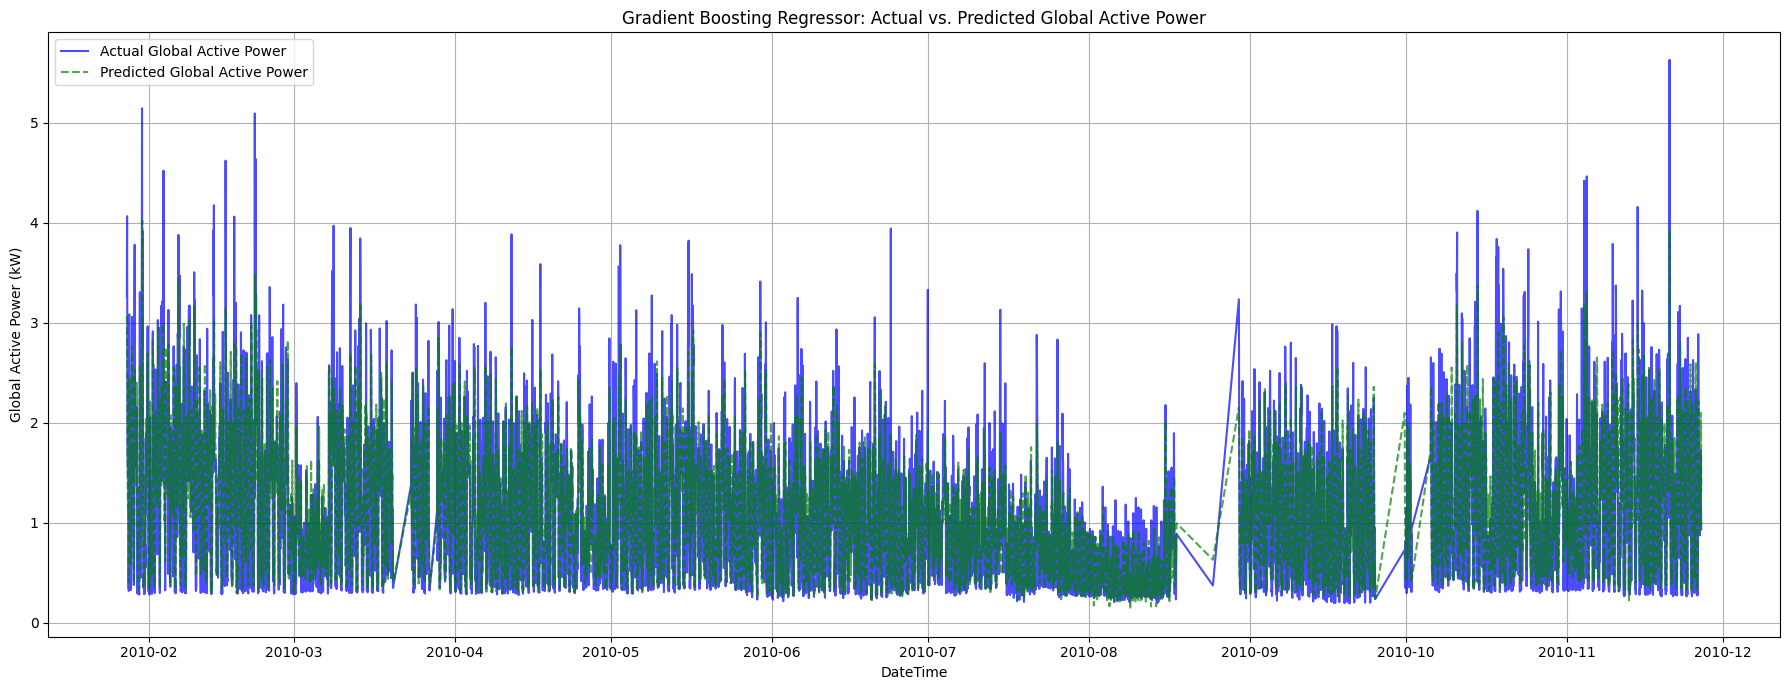

Plot of actual vs. predicted values for GradientBoostingRegressor displayed.


In [60]:
#1.importing GradientBoosting regressor
from sklearn.ensemble import GradientBoostingRegressor
print("Imported GradientBoostingRegressor from sklearn.ensemble.")
print("Instantiating, training, and predicting with GradientBoostingRegressor...")

# 2. Starting a GradientBoostingRegressor model
# Using n_estimators=100 and random_state=42 for reproducibility
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
print("GradientBoostingRegressor instantiated.")

# 3. Training the model
gb_model.fit(X_train, y_train)
print("GradientBoostingRegressor trained successfully.")

# 4. Making predictions on the X_test data
gb_predictions = gb_model.predict(X_test)
print("Predictions made on X_test.")

# 5. Creating a new pandas DataFrame called gb_results_df
# Ensuring the index of gb_results_df is aligned with the original y_test index
gb_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': gb_predictions}, index=y_test.index)
print("Results DataFrame for GradientBoostingRegressor created.")

# 6. Plot the actual vs. predicted values
plt.figure(figsize=(18, 7))
plt.plot(gb_results_df.index, gb_results_df['Actual'], label='Actual Global Active Power', color='blue', alpha=0.7)
plt.plot(gb_results_df.index, gb_results_df['Predicted'], label='Predicted Global Active Power', color='green', alpha=0.7, linestyle='--')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted Global Active Power')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Plot of actual vs. predicted values for GradientBoostingRegressor displayed.")

# Implementing ARIMA Model

Imported ARIMA from statsmodels.tsa.arima.model.
Implementing and forecasting with ARIMA model...
Fitting ARIMA model with order (5, 1, 0)...
ARIMA model fitted successfully.
Making predictions for the period from index 26607 to 33258...
ARIMA predictions made.
Results DataFrame for ARIMA created.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


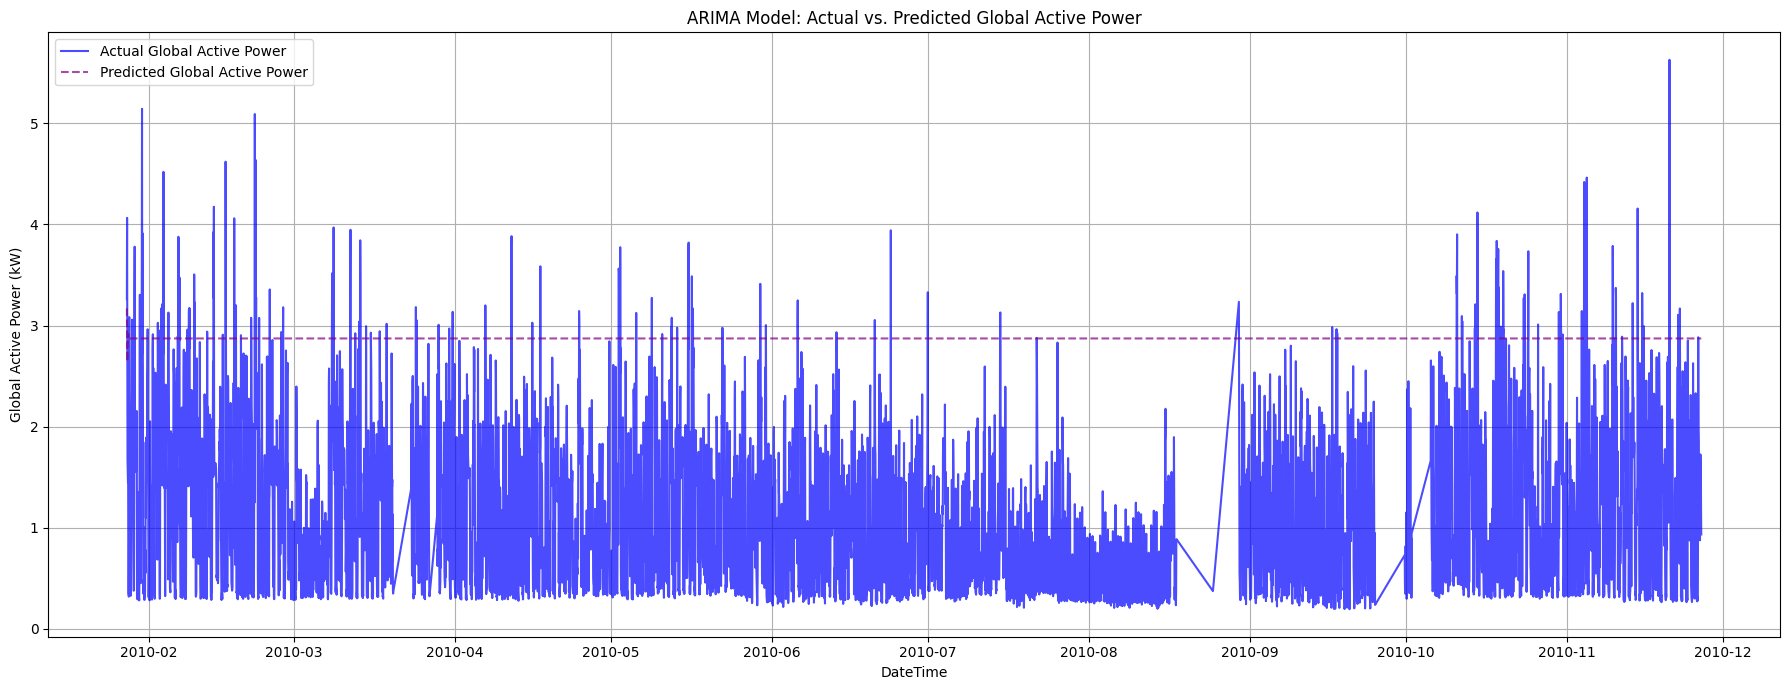

Plot of actual vs. predicted values for ARIMA displayed.


In [61]:
#1.Importing
from statsmodels.tsa.arima.model import ARIMA
print("Imported ARIMA from statsmodels.tsa.arima.model.")


print("Implementing and forecasting with ARIMA model...")

# 2. the training data for the ARIMA model as y_train
# This is already done in previous steps (y_train Series)

# 3. Fit an ARIMA model to the y_train data.
# For this starting implementation, consider starting with an order (p, d, q) like (5, 1, 0)
# (p, d, q) = (AR order, differencing order, MA order)
arima_order = (5, 1, 0)
print(f"Fitting ARIMA model with order {arima_order}...")

# Suppressing ConvergenceWarning from ARIMA for cleaner output in this example
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    arima_model = ARIMA(y_train, order=arima_order)
    arima_model_fit = arima_model.fit()
print("ARIMA model fitted successfully.")

# 4. predictions using the fitted ARIMA model for the length of y_test
# The start and end indices for prediction should be relative to the training data length.
# The forecast starts at the first step after y_train and ends at the last step of y_test.
start_forecast_index = len(y_train)
end_forecast_index = len(y_train) + len(y_test) - 1

print(f"Making predictions for the period from index {start_forecast_index} to {end_forecast_index}...")
arima_predictions = arima_model_fit.predict(start=start_forecast_index, end=end_forecast_index)
print("ARIMA predictions made.")

# It's important that the predictions align with the y_test index.
# Reindex the predictions to match the DateTime index of y_test.
arima_predictions.index = y_test.index
arima_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': arima_predictions}, index=y_test.index)
print("Results DataFrame for ARIMA created.")

# 6. Plot the actual vs. predicted values
plt.figure(figsize=(18, 7))
plt.plot(arima_results_df.index, arima_results_df['Actual'], label='Actual Global Active Power', color='blue', alpha=0.7)
plt.plot(arima_results_df.index, arima_results_df['Predicted'], label='Predicted Global Active Power', color='purple', alpha=0.7, linestyle='--')
plt.title('ARIMA Model: Actual vs. Predicted Global Active Power')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Plot of actual vs. predicted values for ARIMA displayed.")

Calculating **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R2)** for the predictions of the Random Forest, Gradient Boosting, and ARIMA models against the actual values in y_test.

In [62]:
#importing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt function

print("Imported mean_absolute_error, mean_squared_error, r2_score from sklearn.metrics and numpy.")
print("Calculating evaluation metrics for Random Forest, Gradient Boosting, and ARIMA models...")

# 1. Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("\n--- Random Forest Regressor Metrics ---")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R2 Score: {rf_r2:.4f}")

# 2. Gradient Boosting Regressor
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

print("\n--- Gradient Boosting Regressor Metrics ---")
print(f"MAE: {gb_mae:.4f}")
print(f"RMSE: {gb_rmse:.4f}")
print(f"R2 Score: {gb_r2:.4f}")

# 3. ARIMA Model
# Ensure arima_predictions has the correct DateTime index for alignment with y_test
# We already set arima_predictions.index = y_test.index in the previous cell.
# If for any reason it lost the DateTime index, re-assign it here to be safe.
if not isinstance(arima_predictions.index, pd.DatetimeIndex):
    arima_predictions.index = y_test.index

# Now, arima_predictions should have the correct index, so directly use it.
# No need for .reindex() and .fillna() if indices are already aligned and predictions are not inherently NaN.

arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
arima_r2 = r2_score(y_test, arima_predictions)

print("\n--- ARIMA Model Metrics ---")
print(f"MAE: {arima_mae:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"R2 Score: {arima_r2:.4f}")

print("Evaluation metrics calculation complete.")

Imported mean_absolute_error, mean_squared_error, r2_score from sklearn.metrics and numpy.
Calculating evaluation metrics for Random Forest, Gradient Boosting, and ARIMA models...

--- Random Forest Regressor Metrics ---
MAE: 0.3475
RMSE: 0.4992
R2 Score: 0.5660

--- Gradient Boosting Regressor Metrics ---
MAE: 0.3440
RMSE: 0.4898
R2 Score: 0.5821

--- ARIMA Model Metrics ---
MAE: 1.8639
RMSE: 1.9902
R2 Score: -5.8987
Evaluation metrics calculation complete.


# Visualize Combined Model Performance


Model Comparison Summary:
                        MAE      RMSE        R2
Random Forest      0.347492  0.499175  0.566020
Gradient Boosting  0.344040  0.489834  0.582110
ARIMA              1.863906  1.990225 -5.898719


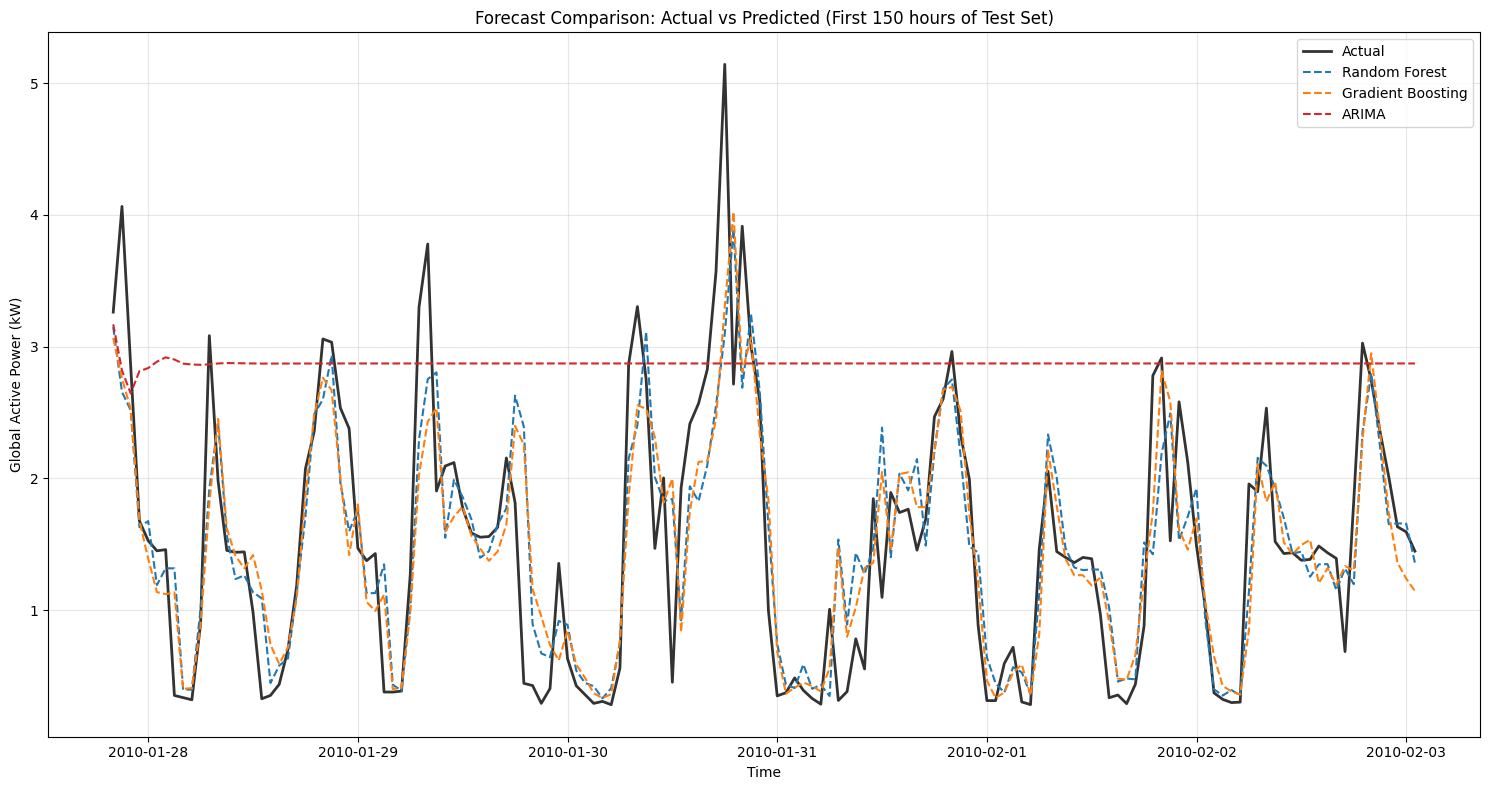


Based on RMSE, the best performing model is: Gradient Boosting
With RMSE: 0.4898


In [64]:
# Creating a dictionary of all predictions for easy iteration
predictions = {
    'Random Forest': pd.Series(rf_predictions, index=y_test.index),
    'Gradient Boosting': pd.Series(gb_predictions, index=y_test.index),
    'ARIMA': arima_predictions # arima_predictions already has the correct DateTimeIndex
}

# Creating a dictionary of all results for comparison
results = {
    'Random Forest': {'MAE': rf_mae, 'RMSE': rf_rmse, 'R2': rf_r2},
    'Gradient Boosting': {'MAE': gb_mae, 'RMSE': gb_rmse, 'R2': gb_r2},
    'ARIMA': {'MAE': arima_mae, 'RMSE': arima_rmse, 'R2': arima_r2}
}

# Creating a comparison dataframe
results_df = pd.DataFrame(results).T
print("\nModel Comparison Summary:")
print(results_df)

# Plotting Predictions vs Actuals (taking a slice for clarity)
# Plotting the first 150 hours of the test set
slice_n = 150

plt.figure(figsize=(15, 8))
# Plot Actual
plt.plot(y_test.index[:slice_n], y_test.iloc[:slice_n], label='Actual', color='black', linewidth=2, alpha=0.8)

# Plot Predictions
colors = ['tab:blue', 'tab:orange', 'tab:red']
for i, (name, pred) in enumerate(predictions.items()):
    plt.plot(y_test.index[:slice_n], pred[:slice_n], label=f'{name}', linestyle='--', color=colors[i])

plt.title(f'Forecast Comparison: Actual vs Predicted (First {slice_n} hours of Test Set)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)') # Adjusted label for consistency
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identify Best Model
best_model_name = results_df['RMSE'].idxmin()
print(f"\nBased on RMSE, the best performing model is: {best_model_name}")
print(f"With RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f}")